# Explore US Bikeshare Data

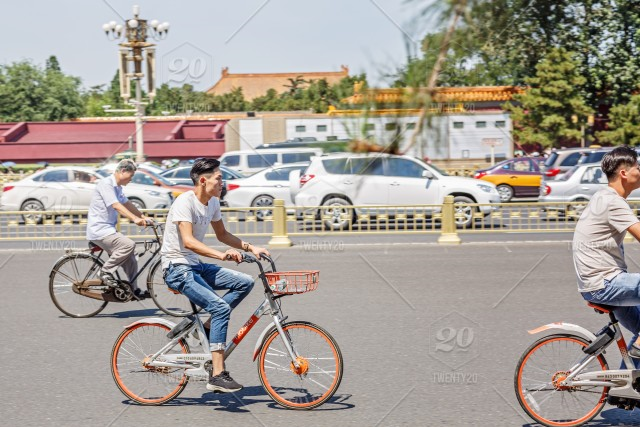

## Introduction

This is an exploratory data analysis of the bikeshare data of three large US cities; Chicago, New York City and Washington.

Bicycle-sharing systems allow users to rent bicycles on a very short-term
basis for a price. This allows people to borrow a bike from point A and return it at point B,
though they can also return it to the same location if they'd like to just go for a ride.

The aim of this analysis is to uncover bike share usage patterns and compare usage between the three cities.

Data was provided by Motivate - https://www.motivateco.com/ ...a bike
share system provider for many major cities in the United States.


## Data Understanding

We were provided with 3 data files, one for each city.

There are 6 main columns in each data files:   
    
1. Start Time (e.g., 2017-01-01 00:07:57)
2. End Time (e.g., 2017-01-01 00:20:53)
3. Trip Duration (in seconds - e.g., 776)
4. Start Station (e.g., Broadway & Barry Ave)
5. End Station (e.g., Sedgwick St & North Ave)
6. User Type (Subscriber or Customer)

The Chicago and New York City files also have the following two columns:
- Gender
- Birth Year


In [2]:
#importing libraries

import time                                             # to parse dates


import pandas as pd                                     # for data manipulation


import numpy as np                                      # for statistical analysis

# Data Cleaning

In [2]:
# loading data

chicago = pd.read_csv('chicago.csv')
nyc = pd.read_csv('new_york_city.csv')
washington = pd.read_csv('washington.csv')

In [3]:
# cleaning chicago data

#chicago.info()
chicago.isnull().sum()                                      #checking for null values

chicago['Gender'].value_counts()                            #indicates the no of unique values in the Gender column

mode_gender = chicago['Gender'].mode()[0]
chicago['Gender'].fillna(mode_gender, inplace=True)          #replacing null values in Gender column with the mode of the column



#repeat the same process for the Birth Year column

chicago['Birth Year'].value_counts()

chicago.describe(include='all')                              #used to display statistical info like mean, count, etc

avg_year = chicago['Birth Year'].mean()
chicago['Birth Year'].fillna(avg_year, inplace=True)     #replacing null values in Birth Year column with the mean of the column


chicago.isnull().sum()                                       #checking to confirm no null values

Unnamed: 0       0
Start Time       0
End Time         0
Trip Duration    0
Start Station    0
End Station      0
User Type        0
Gender           0
Birth Year       0
dtype: int64

In [4]:
# cleaning nyc data

#nyc.info

nyc.isnull().sum()
nyc.describe(include='all')

usertype_mode = nyc['User Type'].mode()[0]
nyc['User Type'].fillna(usertype_mode, inplace=True)

nyc['Gender'].value_counts()
mode_gender = nyc['Gender'].mode()[0]
nyc['Gender'].fillna(mode_gender, inplace=True)

nyc['Birth Year'].value_counts()
avg_year = nyc['Birth Year'].mean()
nyc['Birth Year'].fillna(avg_year, inplace=True)


nyc.isnull().sum()

Unnamed: 0       0
Start Time       0
End Time         0
Trip Duration    0
Start Station    0
End Station      0
User Type        0
Gender           0
Birth Year       0
dtype: int64

In [5]:
# cleaning washington data

#washington.info()
washington.isnull().sum()

Unnamed: 0       0
Start Time       0
End Time         0
Trip Duration    0
Start Station    0
End Station      0
User Type        0
dtype: int64

Washington data has no null values. It has no 'Gender' and 'Birth Year' column also.

In [6]:
city_data = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

months = ['all','january', 'february', 'march', 'april', 'may', 'june']

days = ['all','monday','tuesday','wednesday','thursday','friday','saturday','sunday']

# FUNCTIONS

## 1. def get_filters()

In [8]:
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    while True:
        try:
            city = str(input("Please enter your city: ")).lower()
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue

        if city not in city_data:
            print("Please input one of these cities: Chicago, New York City or Washington")
            continue
        else:
        #city input was successfully parsed, and we're happy with its value.
        #we're ready to exit the loop.
            break


    # get user input for month (all, january, february, ... , june)
    while True:
        try:
            month = str(input("Please enter the month: ")).lower()
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
            

        if month not in months:
            print("Please enter a month between january to june or all to apply no filters")
        
        
            continue
        else:
            
        #month_input was successfully parsed, and we're happy with its value.
        #we're ready to exit the loop.
            break
    if month == 'all':
          print(months[1:])
            


    # get user input for day of week (all, monday, tuesday, ... sunday)
    while True:
        try:
            day = str(input("Please enter the day: ")).lower()
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue

        if day not in days:
            print("Please enter a day of the week or all to apply no filters")
        
            continue
        else:
            
        #day_input was successfully parsed, and we're happy with its value.
        #we're ready to exit the loop.
            break
    if day == 'all':
        print(days[1:])
        


    print('-'*40)
    return city, month, day

get_filters()

Hello! Let's explore some US bikeshare data!
Please enter your city: chicago
Please enter the month: april
Please enter the day: WEDNESDAY
----------------------------------------


('chicago', 'april', 'wednesday')

## 2. def load_data()

In [9]:
def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - pandas DataFrame containing city data filtered by month and day
    """
    
    # load data file into a dataframe
    df = pd.read_csv(city_data[city])

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.day_name()      
    df['hour'] = df['Start Time'].dt.hour
 

    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1

        # filter by month to create the new dataframe
        df = df[df['month'] == month]
    
    # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]
        
    return df

df = load_data('chicago','january','sunday')
df

Unnamed: 0          Start Time             End Time  Trip Duration  \
11           71678 2017-01-22 15:15:45  2017-01-22 15:31:02            917   
12           19061 2017-01-08 16:03:00  2017-01-08 16:07:37            277   
120           1647 2017-01-01 21:06:09  2017-01-01 21:10:37            268   
143          18745 2017-01-08 13:23:19  2017-01-08 13:28:52            333   
234           1188 2017-01-01 16:09:40  2017-01-01 16:16:08            388   
...            ...                 ...                  ...            ...   
299275      102115 2017-01-29 18:05:38  2017-01-29 18:16:22            644   
299450      101611 2017-01-29 13:47:42  2017-01-29 14:09:06           1284   
299460        1557 2017-01-01 19:14:50  2017-01-01 19:46:15           1885   
299752       40281 2017-01-15 13:49:32  2017-01-15 13:54:19            287   
299908       69745 2017-01-22 02:29:02  2017-01-22 02:33:26            264   

                         Start Station                   End Station  \
11      Southport Ave & Wellington Ave        Clark St & Schiller St   
12               Green St & Madison St      Ada St & Washington Blvd   
120          Sedgwick St & Webster Ave   Halsted St & Wrightwood Ave   
143             State St & Harrison St            Wells St & Polk St   
234       Cornell Ave & Hyde Park Blvd       Greenwood Ave & 47th St   
...                                ...                           ...   
299275           Dearborn St & Erie St         Wells St & Concord Ln   
299450       Southport Ave & Roscoe St        Damen Ave & Pierce Ave   
299460          Wabash Ave & Wacker Pl         Rush St & Superior St   
299752   Ravenswood Ave & Lawrence Ave  Ravenswood Ave & Berteau Ave   
299908              State St & 33rd St          Rhodes Ave & 32nd St   

         User Type  Gender  Birth Year  month day_of_week  hour  
11      Subscriber    Male      1964.0      1      Sunday    15  
12      Subscriber    Male      1961.0      1      Sunday    16  
120     Subscriber    Male      1984.0      1      Sunday    21  
143     Subscriber    Male      1954.0      1      Sunday    13  
234     Subscriber    Male      1966.0      1      Sunday    16  
...            ...     ...         ...    ...         ...   ...  
299275  Subscriber  Female      1978.0      1      Sunday    18  
299450  Subscriber    Male      1989.0      1      Sunday    13  
299460    Customer     NaN         NaN      1      Sunday    19  
299752  Subscriber    Male      1994.0      1      Sunday    13  
299908  Subscriber    Male      1993.0      1      Sunday     2  

[1875 rows x 12 columns]

## 3. def time_stats()

In [10]:
def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # display the most common month
    
    months = ['all', 'january', 'february', 'march', 'april', 'may', 'june']
    popular_month = df['month'].mode()[0]

    print('Most Popular Month:', months[popular_month].title())


    # display the most common day of week
          
    common_day_of_week = df['day_of_week'].mode()[0]
    print("The most common day of week is", common_day_of_week)


    # display the most common start hour
    
    common_start_hour = df['hour'].mode()[0]
    print("The most common start hour is", str(common_start_hour))


    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

## 4. def station_stats()

In [11]:
def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # display most commonly used start station
    commonly_used_start_station = df['Start Station'].mode()[0]
    print('The most commonly used start station:', commonly_used_start_station)


    # display most commonly used end station
    commonly_used_end_station = df['End Station'].mode()[0]
    print('The most commonly used end station:', commonly_used_end_station)


    # display most frequent combination of start station and end station trip
    start_end_combo = (df['Start Station'] + ' and ' + df['End Station']).mode()[0]
    print('The most frequent combination of start station and end station is', start_end_combo)

    

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)
    

## 5. def trip_duration_stats()

In [12]:
def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()
    

    # display total travel time
    total_travel_time = df['Trip Duration'].sum()
    print('Total travel time is:', str(total_travel_time))

   
    # display highest trip duration
    highest_trip_duration = df['Trip Duration'].max()
    print('Highest travel time is:', str(highest_trip_duration))
    
    # display lowest trip duration
    lowest_trip_duration = df['Trip Duration'].min()
    print('Lowest travel time is:', str(lowest_trip_duration))


    # display mean travel time
    mean_travel_time = df['Trip Duration'].mean()
    print('Mean travel time is:', str(mean_travel_time))



    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)    


## 6. def user_stats()

In [13]:
def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # Display counts of user types
    
    print('User Type Stats:')
    print(df['User Type'].value_counts())


    # Display counts of gender
    
    
    if 'Gender' in df.columns:                                            # checking to see if dataframe contains Gender column
        gender_count = df['Gender'].value_counts()
        print('Gender Stats:')
        print(str(gender_count))
        
    else:
        print("There's no information on gender for your selected data")

    # Display earliest, most recent, and most common year of birth
    
    if 'Birth Year' in df.columns:                                       # checking to see if dataframe contains Gender column         
        earliest_birth = df['Birth Year'].min()
        print('Earliest year of birth is', int(earliest_birth))
        
        most_recent  = df['Birth Year'].max()
        print('Most recent year of birth is', int(most_recent))
        
        most_common = df['Birth Year'].mode()
        print('Most common year of birth is', int(most_common))
        
        
    else:
        print("There's no information on birth year for your selected data")
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)
    

## 7. def show_raw_data

In [14]:
def show_raw_data(df):
    

    df = pd.read_csv('chicago.csv')
    """Displays raw data on user request.
    Args:
        (DataFrame) df - Pandas DataFrame containing city data filtered by month and day
    """
    while True:
        raw_data = input('\nWould you like to see the first 5 rows of raw data? Enter yes or no.\n')
        if raw_data.lower() != 'yes':
            break
                
            
        else:
            print(df.head())
            next = 0
            while True:
            
                raw_data = input('\nWould you like to see the next five rows of raw data? Enter yes or no.\n')
                if raw_data.lower() == 'yes':
                    next += 5
                    print(df.iloc[next:next+5])
                    continue
                
                if raw_data.lower()!= 'yes':
                    break
        
            break        
        
show_raw_data(df)


Would you like to see the first 5 rows of raw data? Enter yes or no.
YES
   Unnamed: 0           Start Time             End Time  Trip Duration  \
0     1423854  2017-06-23 15:09:32  2017-06-23 15:14:53            321   
1      955915  2017-05-25 18:19:03  2017-05-25 18:45:53           1610   
2        9031  2017-01-04 08:27:49  2017-01-04 08:34:45            416   
3      304487  2017-03-06 13:49:38  2017-03-06 13:55:28            350   
4       45207  2017-01-17 14:53:07  2017-01-17 15:02:01            534   

                   Start Station                   End Station   User Type  \
0           Wood St & Hubbard St       Damen Ave & Chicago Ave  Subscriber   
1            Theater on the Lake  Sheffield Ave & Waveland Ave  Subscriber   
2             May St & Taylor St           Wood St & Taylor St  Subscriber   
3  Christiana Ave & Lawrence Ave  St. Louis Ave & Balmoral Ave  Subscriber   
4         Clark St & Randolph St  Desplaines St & Jackson Blvd  Subscriber   

   Gender  B

## 8. def main()

In [18]:
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        show_raw_data(df)
        
        

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()

Hello! Let's explore some US bikeshare data!
Please enter your city: new york city
Please enter the month: all
['january', 'february', 'march', 'april', 'may', 'june']
Please enter the day: all
['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
----------------------------------------

Calculating The Most Frequent Times of Travel...

Most Popular Month: June
The most common day of week is Wednesday
The most common start hour is 17

This took 0.15009212493896484 seconds.
----------------------------------------

Calculating The Most Popular Stations and Trip...

The most commonly used start station: Pershing Square North
The most commonly used end station: Pershing Square North
The most frequent combination of start station and end station is E 7 St & Avenue A and Cooper Square & E 7 St

This took 0.8576390743255615 seconds.
----------------------------------------

Calculating Trip Duration...

Total travel time is: 269905248
Highest travel time is: 2155775